# Example on libhussar <-> Python interfacing
This example shows how to use the simulations from `libhussar` and visualize or process them further in Python.
If you want to run this example yourself, please compile the `1_dihedral` example and execute it.
It will produce a file called `dihedral.SIM`, which we will read in this notebook.

In [1]:
# The path to where you have executed the `1_dihedral` program
# Note: this will be the directory the `dihedral.SIM` file will be in
BUILD_PATH = "../build/"

In [4]:
# Import some dependencies for processing and visualization
import matplotlib.pyplot as plt
import numpy as np
import os.path

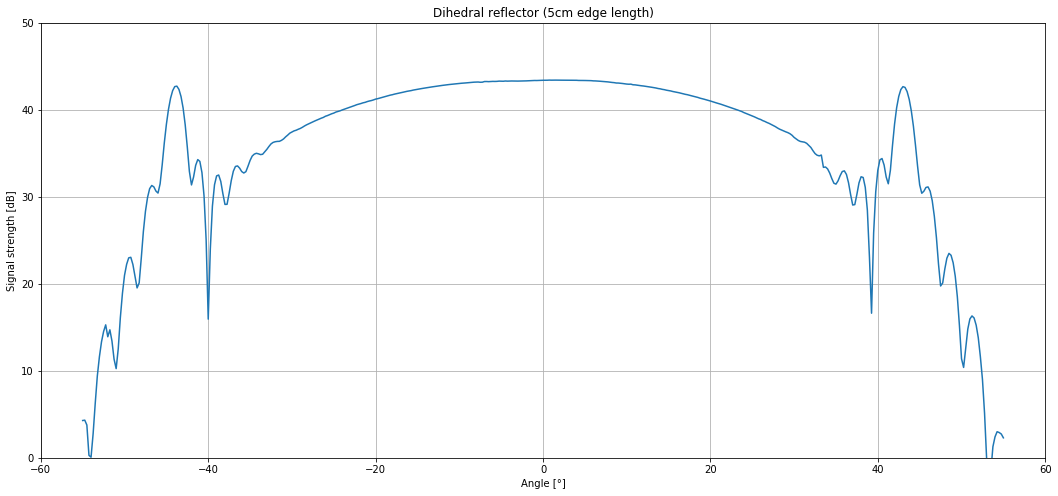

In [3]:
def dB(x):
    return 20 * np.log(x) / np.log(10)

simulation_file = os.path.join(BUILD_PATH, "dihedral.SIM")

# The file itself is just a bunch of complex numbers in binary format
d = np.fromfile(simulation_file, dtype=np.complex64)

# We need to reshape it to make sense of the Radar cube
# Note: we have a four-dimensional tensor here, since the first dimension is the
# angle at which we looked at the dihedral reflector
d = d.reshape((-1, 128, 256, 4))

# We throw away two dimensions of the radar cube:
# 1) we are only interested in the DC chirp, since no objects were moving
# 2) we are only interested in the DC angle, since we do not care about imaging here
d = d[:,0,:,0]

plt.figure(figsize=(18,8))
plt.title("Dihedral reflector (5cm edge length)")

angle = np.linspace(-55, +55, d.shape[0])
plt.plot(angle, dB(np.abs(d[:,20]))) # visualize sample index 20 (corresponds to ~90cm distance)

plt.xlim(-60, +60)
plt.xlabel("Angle [°]")

plt.ylim(0, 50)
plt.ylabel("Signal strength [dB]")

plt.grid(which="both")
plt.show()